In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
def weighted_average(array, weights):
    average = 0
    for n in range(len(array)):
        average += array[n]*weights[n]/sum(weights)
    return average
        
journals = np.array(["Molecules", "Phytochemistry", "J. Nat. Prod"])
sum_of_all_structures = np.array([396+33, 182+29, 306+24]) # real amount of structures
complete_structures_only_model = np.array([321, 152, 250])
complete_structures = np.array([396, 182, 306])
recognized_structures = np.array([398, 182, 306])
too_much_only_model = [44, 10, 29]
too_much = [50, 21, 29]

recognized_structure_proportions = recognized_structures/sum_of_all_structures
complete_structures_only_model_proportions = complete_structures_only_model/recognized_structures
complete_structures_proportions = complete_structures/recognized_structures
too_much_only_model_proportions = too_much_only_model / recognized_structures
too_much_proportions = too_much / recognized_structures


df_array= np.array([journals, 
                    recognized_structure_proportions,
                   complete_structures_only_model_proportions,
                   complete_structures_proportions,
                   too_much_only_model_proportions,
                   too_much_proportions])

labels = np.array([["Journals"],
                   ["Proportion of recognized structures"], 
                    ["Complete structures (only model) (proportions)"],
                   ["Complete structures (proportions)"],
                  ["too much (only model) (proportions)"],
                  ["too much (proportions)"]])

weighted_averages = np.array([["Weighted average"],
                             [weighted_average(recognized_structure_proportions, sum_of_all_structures)],
                             [weighted_average(complete_structures_only_model_proportions, recognized_structures)],
                             [weighted_average(complete_structures_proportions, recognized_structures)],
                             [weighted_average(too_much_only_model_proportions, recognized_structures)],
                             [weighted_average(too_much_proportions, recognized_structures)]])

pd.DataFrame(np.concatenate((labels, df_array, weighted_averages), axis = 1)).round(1)



,0,1,2,3,4
0,Journals,Molecules,Phytochemistry,J. Nat. Prod,Weighted average
1,Proportion of recognized structures,0.9277389277389277,0.8625592417061612,0.9272727272727272,0.9134020618556701
2,Complete structures (only model) (proportions),0.8065326633165829,0.8351648351648352,0.8169934640522876,0.8160270880361173
3,Complete structures (proportions),0.9949748743718593,1.0,1.0,0.9977426636568849
4,too much (only model) (proportions),0.11055276381909548,0.054945054945054944,0.09477124183006536,0.09367945823927765
5,too much (proportions),0.12562814070351758,0.11538461538461539,0.09477124183006536,0.11286681715575621


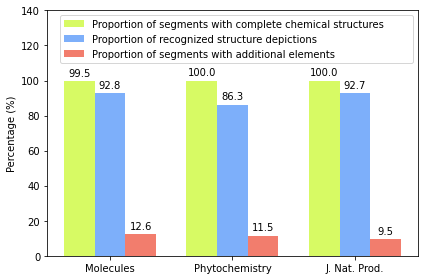

In [65]:
# This plot has been created according to the tutorial on 
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
#height = [306*100/331, 295*100/306, 183*100/206, 177*100/183, 398*100/403, 387*100/398]
labels = ('Molecules', 'Phytochemistry', 'J. Nat. Prod.')
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, complete_structures_proportions*100, width, label="Proportion of segments with complete chemical structures        ", color = "#D7FA64")
rects2 = ax.bar(x, recognized_structure_proportions*100, width, label="Proportion of recognized structure depictions", color = "#7DAFFA")
rects3 = ax.bar(x + width, too_much_proportions*100, width, label="Proportion of segments with additional elements", color = "#F27D6D")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,140)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        height = round(height, 1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()
plt.savefig("segment_analysis.png", dpi=400)
plt.show()